In [1]:
import numpy as np
import pandas
dtypes = {'INTERVALSTARTTIME_GMT'}
parse_dates = pandas.to_datetime
JanData = pandas.read_csv('JanuaryData.csv', parse_dates = [0,1])
FebData = pandas.read_csv('FebuaryData.csv', parse_dates = [0,1])


In [65]:
import matplotlib.pyplot as plt
JlmpData = JanData[JanData['LMP_TYPE'] == 'LMP']
JlmpData = JlmpData.sort_values(by = 'INTERVALSTARTTIME_GMT')
JlmpData['INTERVALSTARTTIME_CAL'] = JlmpData['INTERVALSTARTTIME_GMT'] - pandas.Timedelta(hours = 7)

FlmpData = FebData[FebData['LMP_TYPE'] == 'LMP']
FlmpData = FlmpData.sort_values(by = 'INTERVALSTARTTIME_GMT')
FlmpData['INTERVALSTARTTIME_CAL'] = FlmpData['INTERVALSTARTTIME_GMT'] - pandas.Timedelta(hours = 7)

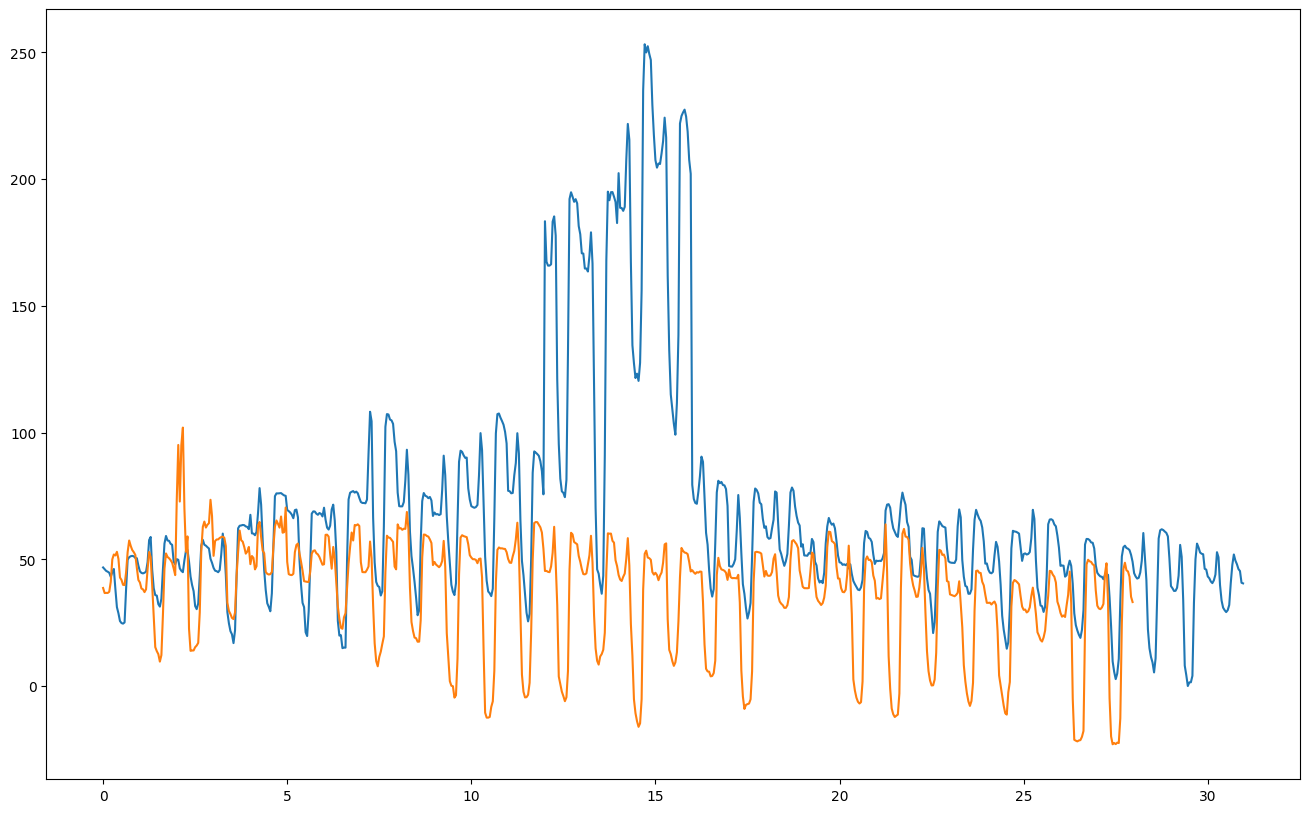

In [105]:
GOLDEN_RATIO = 1.618
plt.figure(figsize = (10 * GOLDEN_RATIO, 10))
plt.plot((JlmpData['INTERVALSTARTTIME_CAL'] - JlmpData['INTERVALSTARTTIME_CAL'].iloc[0]).dt.total_seconds()/3600/24, JlmpData['MW'])
plt.plot((FlmpData['INTERVALSTARTTIME_CAL'] - FlmpData['INTERVALSTARTTIME_CAL'].iloc[0]).dt.total_seconds()/3600/24, FlmpData['MW'])
plt.show()

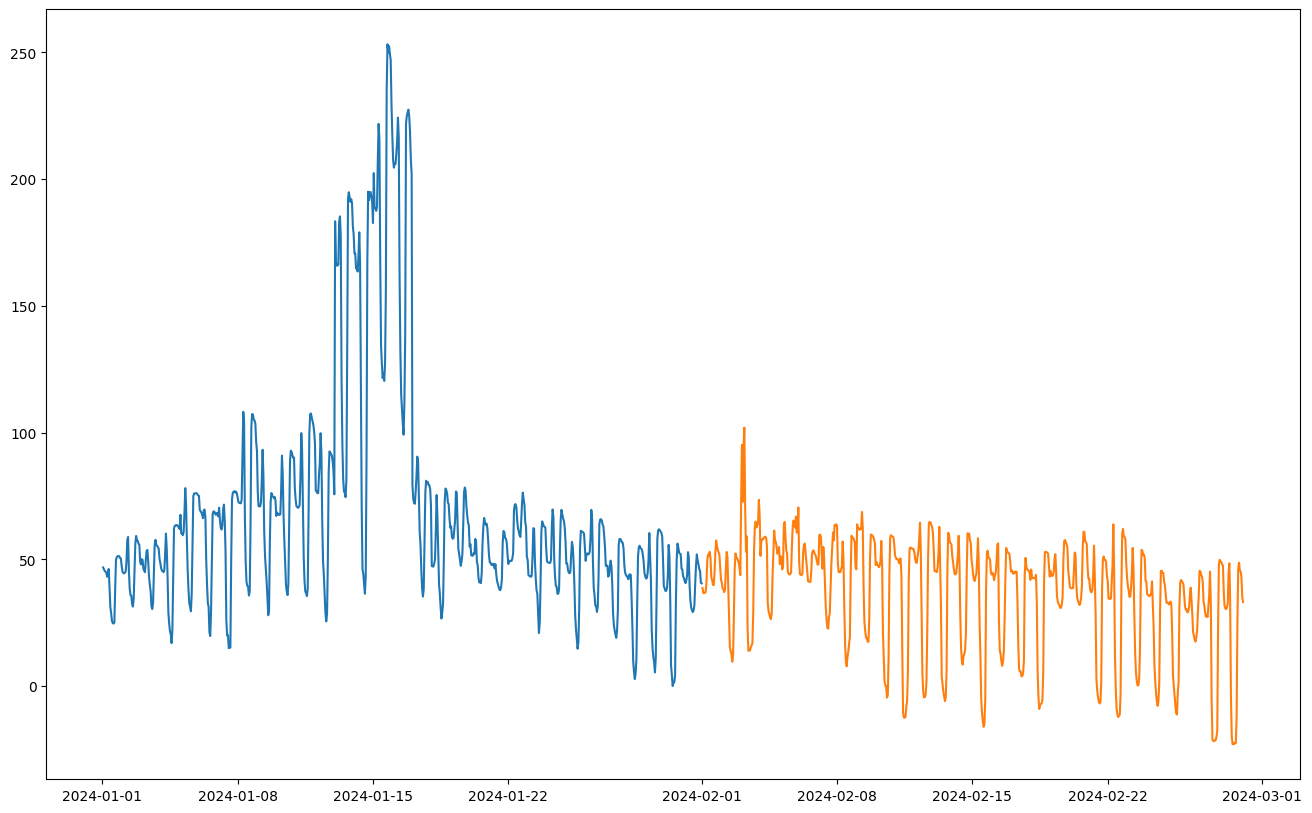

In [68]:
GOLDEN_RATIO = 1.618
plt.figure(figsize = (10 * GOLDEN_RATIO, 10))
plt.plot(JlmpData['INTERVALSTARTTIME_CAL'], JlmpData['MW'])
plt.plot(FlmpData['INTERVALSTARTTIME_CAL'], FlmpData['MW'])
plt.show()

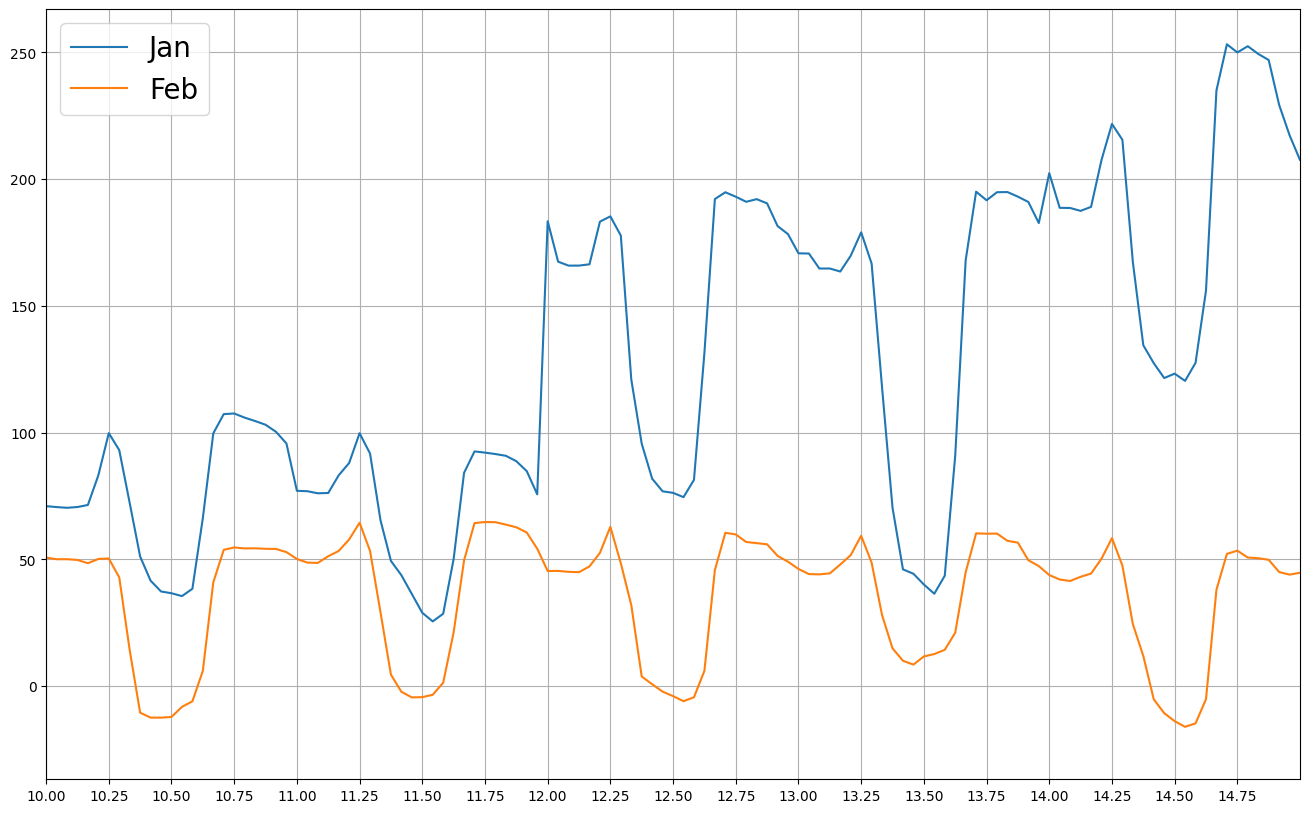

In [111]:
GOLDEN_RATIO = 1.618
plt.figure(figsize = (10 * GOLDEN_RATIO, 10))
plt.plot((JlmpData['INTERVALSTARTTIME_CAL'] - JlmpData['INTERVALSTARTTIME_CAL'].iloc[0]).dt.total_seconds()/3600/24, JlmpData['MW'], label = 'Jan')
plt.plot((FlmpData['INTERVALSTARTTIME_CAL'] - FlmpData['INTERVALSTARTTIME_CAL'].iloc[0]).dt.total_seconds()/3600/24, FlmpData['MW'], label = 'Feb')
plt.xlim([10, 15])
plt.xticks(np.arange(10, 15, 0.25))
plt.grid()
plt.legend(fontsize = 20)
plt.show()